In [ ]:
https://mlbootcamp.ru/article/tutorial/

# Руководство для начинающих

## «Поехали!»


Обычно в задаче анализа данных имеется некоторая прямоугольная таблица. Ее строки соответствуют объектам, а столбцы – признакам этих объектов. Объекты также называются наблюдениями или примерами (samples), а признаки – атрибутами (features).

Признаки бывают количественными (как, например, доход в рублях или рост в сантиметрах и т.д.) или категориальными (как, например, марка автомобиля, модель телефона и т.д.).

Один из признаков (столбцов) выделен. Этот признак называется ответом. Остальные признаки – входные. Требуется по имеющейся таблице научиться по новому объекту, которого нет в таблице, но для которого известны значения входных признаков, по возможности с небольшой ошибкой предсказывать значение выделенного признака (ответа).

Если ответ количественный, то задача называется задачей восстановления регрессии. Если ответ категориальный, то задача называется задачей классификации.

Здесь мы будем предполагать, что читатель знаком с python. Для решения задачи анализа данных воспользуемся библиотеками numpy, pandas и scikit-learn. Библиотека numpy содержит реализации многомерных массивов и алгоритмов линейной алгебры. Библиотека pandas предоставляет широкий спектр функций по обработке табличных данных. Библиотека scikit-learn реализует множество алгоритмов машинного обучения. Кроме того, нам понадобится библиотека matplotlib для научной визуализации.

Наиболее простой способ получить все требуемые библиотеки в python – установить дистрибутив anaconda. Приведенный ниже код тестировался на дистрибутиве anaconda 2.2.0 (с python версии 2.7). Далее будем предполагать, что все требующееся программное обеспечение установлено.

Вначале подключим библиотеки:

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

## Загружаем данные

В качестве примера рассмотрим задачу определения кредитной платежеспособности (кредитного скрининга). Пусть имеются данные о клиентах, обратившихся за кредитом. Здесь объектами являются клиенты, а признаками могут являться их пол, уровень дохода, образование, информация о том, имеется или отсутствует у них положительная кредитная история и т.д.

В качестве выделенного признака (ответа) выступает информация о том, вернул ли клиент кредит в банк или нет. По этим данным требуется научиться предсказывать, вернет ли кредит новый клиент, обратившийся в банк.

Таким образом, речь идет о задаче классификации: требуется определить, какому классу: положительному (кредит будет возвращен) или отрицательному (кредит не будет возвращен) – принадлежит клиент.

В качестве модельных данных возьмем Credit Approval Data Set (https://archive.ics.uci.edu/ml/datasets/Credit+Approval) из коллекции UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/index.html).

Данные имеют формат csv и их можно скачать по указанному ниже адресу:

In [4]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data'
data = pd.read_csv(url, header=None, na_values='?')

Параметр header = None означает, что таблица не содержит заголовка (т.е. не содержит названий столбцов), а na_values = '?' означает, что данные содержат пропущенные значения, обозначенные символом ?.

Заметим, что данные можно загрузить вручную с сайта, а затем воспользоваться командой:

data = pd.read_csv('путь/crx.data', header=None, na_values='?')
Итак, мы загрузили данные в таблицу data. Объект data имеет тип DataFrame – это основной тип данных в библиотеке pandas, предназначенный для представления табличных данных.

### Анализируем данные¶
Данные загружены. Попытаемся вначале их качественно проанализировать.

Узнаем размеры таблицы:

In [5]:
data.shape

(690, 16)

Итак, таблица содержит 690 строк (объектов) и 16 столбцов (признаков), включая выходной (целевой) признак.

Мы можем посмотреть на несколько первых и несколько последних строк этой таблицы, чтобы получить представление об имеющихся данных:

In [6]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [7]:
data.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,-
689,b,35.00,3.375,u,g,c,h,8.29,f,f,0,t,g,0.0,0,-


Строки таблицы пронумерованы числами от 0 до 689. Столбцы не имеют каких-либо осмысленных имен и тоже просто пронумерованы.

Согласно описанию рассматриваемой задачи данные содержат информацию о клиентах, запрашивающих кредит. Для сохранения конфиденциальности данные обезличены, все значения категориальных признаков заменены символами, a числовые признаки приведены к другому масштабу. Последний столбец содержит символы + и -, соответствующие тому, вернул клиент кредит или нет.

Для удобства зададим столбцам имена:

In [8]:
data.columns = ['A' + str(i) for i in range(1, 16)] + ['class']
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,class
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


К элементам таблицы можно обращаться, например, так:

In [9]:
data['A5'][687]

'p'

Обратите внимание на порядок следования имен (или номеров) строк и столбцов: вначале в квадратных сокбках указывается имя столбца, а затем – строки. Дело в том, что data['A5'] – это весь столбец A5, поэтому data['A5'][687] – 687-й (при нумерации начиная с 0) элемент этого столбца.

Можно обращаться и по-другому:

In [10]:
data.at[687, 'A5']

'p'

С помощью метода describe() получим некоторую сводную информацию по всей таблице. По умолчанию будет выдана информация только для количественных признаков. Это общее их количество (count), среднее значение (mean), стандартное отклонение (std), минимальное (min), макcимальное (max) значения, медиана (50%) и значения нижнего (25%) и верхнего (75%) квартилей:

In [11]:
data.describe()

,A2,A3,A8,A11,A14,A15
count,678.000000,690.000000,690.000000,690.00000,677.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,1017.385507
std,11.957862,4.978163,3.346513,4.86294,173.806768,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,75.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,276.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


Заметим, что количество элементов в столбцах A2, A14 меньше общего количества объектов (690), что говорит о том, что эти столбцы содержат пропущенные значения.

Выделим числовые и категориальные признаки:

In [13]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print (categorical_columns)
print (numerical_columns)

['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13', 'class']
['A2', 'A3', 'A8', 'A11', 'A14', 'A15']


Теперь мы можем получить некоторую общую информацию по категориальным признакам:

In [14]:
data[categorical_columns].describe()

,A1,A4,A5,A6,A7,A9,A10,A12,A13,class
count,678,684,684,681,681,690,690,690,690,690
unique,2,3,3,14,9,2,2,2,3,2
top,b,u,g,c,v,t,f,f,g,-
freq,468,519,519,137,399,361,395,374,625,383


В таблице для каждого категориального признака приведено общее число заполненных ячеек (count), количество значений, которые принимает данный признак (unique), самое популярное (часто встречающееся) значение этого признака (top) и количество объектов, в которых встречается самое частое значение данного признака (freq).

Вот немного другой способ получить ту же информацию:

In [15]:
data.describe(include=[object])

,A1,A4,A5,A6,A7,A9,A10,A12,A13,class
count,678,684,684,681,681,690,690,690,690,690
unique,2,3,3,14,9,2,2,2,3,2
top,b,u,g,c,v,t,f,f,g,-
freq,468,519,519,137,399,361,395,374,625,383


Определить полный перечень значений категориальных признаков можно, например, так:

In [17]:
for c in categorical_columns:
    print (data[c].unique())

['b' 'a' nan]
['u' 'y' nan 'l']
['g' 'p' nan 'gg']
['w' 'q' 'm' 'r' 'cc' 'k' 'c' 'd' 'x' 'i' 'e' 'aa' 'ff' 'j' nan]
['v' 'h' 'bb' 'ff' 'j' 'z' nan 'o' 'dd' 'n']
['t' 'f']
['t' 'f']
['f' 't']
['g' 's' 'p']
['+' '-']


Здесь nan означают пропущенные значения.

Функция scatter_matrix из модуля pandas.tools.plotting позволяет построить для каждой количественной переменной гистограмму, а для каждой пары таких переменных – диаграмму рассеяния:

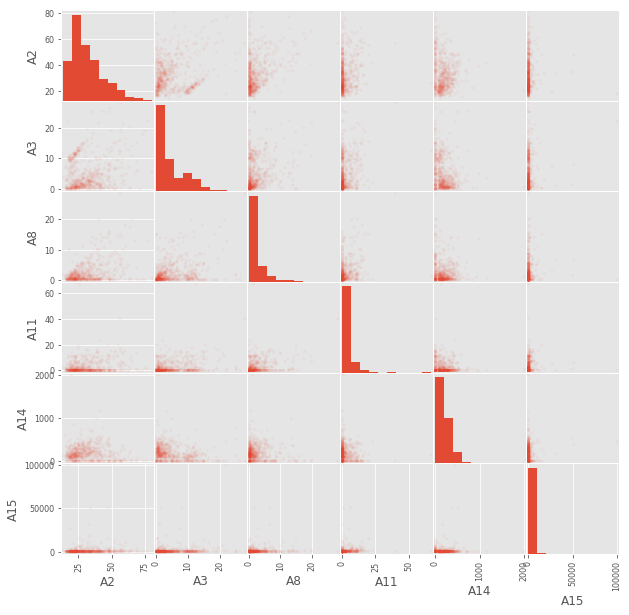

In [19]:
#from pandas.tools.plotting import scatter_matrix   # ! DEPRECATED
from pandas.plotting import scatter_matrix

scatter_matrix(data, alpha=0.05, figsize=(10, 10));

Из построенных диаграмм видно, что признаки не сильно коррелируют между собой, что впрочем можно также легко установить, посмотрев на корреляционную матрицу. Все ее недиагональные значения по модулю не превосходят 0.4:

In [20]:
data.corr()

,A2,A3,A8,A11,A14,A15
A2,1.000000,0.202317,0.395751,0.185912,-0.079812,0.018553
A3,0.202317,1.000000,0.298902,0.271207,-0.224242,0.123121
A8,0.395751,0.298902,1.000000,0.322330,-0.077163,0.051345
A11,0.185912,0.271207,0.322330,1.000000,-0.120096,0.063692
A14,-0.079812,-0.224242,-0.077163,-0.120096,1.000000,0.066853
A15,0.018553,0.123121,0.051345,0.063692,0.066853,1.000000


Можно выбрать любую пару признаков и нарисовать диаграмму рассеяния для этой пары признаков, изображая точки, соответствующие объектам из разных классов разным цветом: + – красный, - – синий. Например, для пары признаков A2, A11 получаем следующую диаграмму:

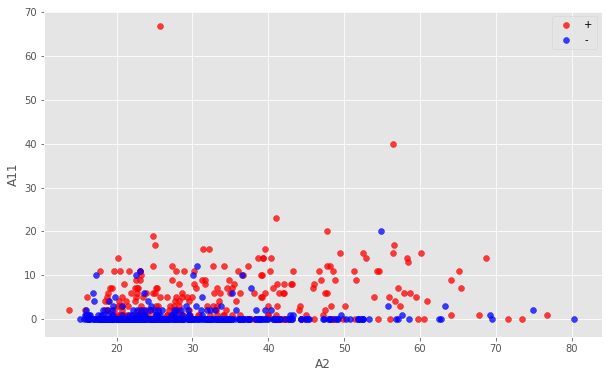

In [21]:
col1 = 'A2'
col2 = 'A11'

plt.figure(figsize=(10, 6))

plt.scatter(data[col1][data['class'] == '+'],
            data[col2][data['class'] == '+'],
            alpha=0.75,
            color='red',
            label='+')

plt.scatter(data[col1][data['class'] == '-'],
            data[col2][data['class'] == '-'],
            alpha=0.75,
            color='blue',
            label='-')

plt.xlabel(col1)
plt.ylabel(col2)
plt.legend(loc='best');

Из диаграммы, в частности, видно, что признак A11 является существенным: как правило, красные точки имеют большое значение этого признака, а синие – маленькое. Иными словами, визуально наблюдается хорошая корреляция между признаками A11 и class. Признак A2, напротив, несет гораздо меньше информации о принадлежности объекта интересующему нас классу.

Вы можете сами попробовать изобразить такие диаграммы рассеяния для других пар признаков и проанализировать их значимость.

К анализу значимости признаков (в том числе категориальных) мы еще вернемся.

## Готовим данные

Алгоритмы машинного обучения из библиотеки scikit-learn не работают напрямую с категориальными признаками и данными, в которых имеются пропущенные значения. Поэтому вначале подготовим наши данные.

## Пропущенные значения

Узнать количество заполненных (непропущенных) элементов можно с помощью метода count. Параметр axis = 0 указывает, что мы двигаемся по размерности 0 (сверху вниз), а не размерности 1 (слева направо), т.е. нас интересует количество заполненных элементов в каждом столбце, а не строке:

In [22]:
data.count(axis=0)

A1       678
A2       678
A3       690
A4       684
A5       684
A6       681
A7       681
A8       690
A9       690
A10      690
A11      690
A12      690
A13      690
A14      677
A15      690
class    690
dtype: int64

Если данные содержат пропущенные значения, то имеется две простые альтернативы:

- удалить столбцы с такими значениями (data = data.dropna(axis=1)),
- удалить строки с такими значениями (data = data.dropna(axis=0)).
После этого, к сожалению, данных может стать совсем мало, поэтому рассмотрим простые альтернативные способы.

##### Количественные признаки¶
Заполнить пропущенные значения можно с помощью метода fillna. Заполним, например, медианными значениями.

axis=0 по-прежнему указывает, что мы двигаемся сверху вниз:

In [23]:
data = data.fillna(data.median(axis=0), axis=0)

Проверим, что теперь все столбцы, соответствующие количественным признакам, заполнены.

In [24]:
data.count(axis=0)

A1       678
A2       690
A3       690
A4       684
A5       684
A6       681
A7       681
A8       690
A9       690
A10      690
A11      690
A12      690
A13      690
A14      690
A15      690
class    690
dtype: int64

##### Категориальные признаки

Теперь рассмотрим пропущенные значения в столбцах, соответствующих категориальным признакам. Простая стратегия – заполнение пропущенных значений самым популярным в столбце. Начнем с A1:

In [26]:
data['A1'].describe()

count     678
unique      2
top         b
freq      468
Name: A1, dtype: object

В столбце A1 имеются пропущенные значения. Наиболее частым (встречается 468 раз) является b. Заполняем все пропуски этим значением:

In [27]:
data['A1'] = data['A1'].fillna('b')

Автоматизируем процесс:

In [28]:
data_describe = data.describe(include=[object])
for c in categorical_columns:
    data[c] = data[c].fillna(data_describe[c]['top'])

Теперь все элементы таблицы заполнены:

In [29]:
data.describe(include=[object])

,A1,A4,A5,A6,A7,A9,A10,A12,A13,class
count,690,690,690,690,690,690,690,690,690,690
unique,2,3,3,14,9,2,2,2,3,2
top,b,u,g,c,v,t,f,f,g,-
freq,480,525,525,146,408,361,395,374,625,383


In [30]:
data.describe()

,A2,A3,A8,A11,A14,A15
count,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000
mean,31.514116,4.758725,2.223406,2.40000,183.562319,1017.385507
std,11.860245,4.978163,3.346513,4.86294,172.190278,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.670000,1.000000,0.165000,0.00000,80.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,37.707500,7.207500,2.625000,3.00000,272.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


## Векторизация

Как уже отмечалось, библиотека scikit-learn не умеет напрямую обрабатывать категориальные признаки. Поэтому прежде чем подавать данные на вход алгоритмов машинного обучения преобразуем категориальные признаки в количественные.

Категориальные признаки, принимающие два значения (т.е. бинарные признаки) и принимающие большее количество значений будем обрабатывать по-разному.

Вначале выделим бинарные и небинарные признаки:

In [33]:
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print (binary_columns, nonbinary_columns)

['A1', 'A9', 'A10', 'A12', 'class'] ['A4', 'A5', 'A6', 'A7', 'A13']


#### Бинарные признаки

Значения бинарных признаков просто заменим на 0 и 1. Начнем с признака A1:

In [35]:
data.at[data['A1'] == 'b', 'A1'] = 0
data.at[data['A1'] == 'a', 'A1'] = 1
data['A1'].describe()

count     690
unique      2
top         0
freq      480
Name: A1, dtype: int64

In [36]:
data_describe = data.describe(include=[object])
data_describe

,A1,A4,A5,A6,A7,A9,A10,A12,A13,class
count,690,690,690,690,690,690,690,690,690,690
unique,2,3,3,14,9,2,2,2,3,2
top,0,u,g,c,v,t,f,f,g,-
freq,480,525,525,146,408,361,395,374,625,383


Автоматизируем процесс:

In [37]:
for c in binary_columns[1:]:
    top = data_describe[c]['top']
    top_items = data[c] == top
    data.loc[top_items, c] = 0
    data.loc[np.logical_not(top_items), c] = 1

Посмотрим на результат:

In [38]:
data[binary_columns].describe()

,A1,A9,A10,A12,class
count,690,690,690,690,690
unique,2,2,2,2,2
top,0,0,0,0,0
freq,480,361,395,374,383


#### Небинарные признаки

К небинарными признакам применим метод векторизации, который заключается в следующем.

Признак j, принимающий s значений, заменим на s признаков, принимащих значения 0 или 1, в зависимости от того, чему равно значение исходного признака j.

Например, в нашей задаче признак A4 принимает 3 различных значения:

In [39]:
data['A4'].unique()

array(['u', 'y', 'l'], dtype=object)

Заменим признак A4 тремя признаками: A4_u, A4_y, A4_l.

- Если признак A4 принимает значение u, то признак A4_u равен 1, A4_y равен 0, A4_l равен 0.
- Если признак A4 принимает значение y, то признак A4_y равен 0, A4_y равен 1, A4_l равен 0.
- Если признак A4 принимает значение l, то признак A4_l равен 0, A4_y равен 0, A4_l равен 1.

Такую векторизацию осуществляет в pandas метод get_dummies:

In [42]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print (data_nonbinary.columns)

Index(['A4_l', 'A4_u', 'A4_y', 'A5_g', 'A5_gg', 'A5_p', 'A6_aa', 'A6_c',
       'A6_cc', 'A6_d', 'A6_e', 'A6_ff', 'A6_i', 'A6_j', 'A6_k', 'A6_m',
       'A6_q', 'A6_r', 'A6_w', 'A6_x', 'A7_bb', 'A7_dd', 'A7_ff', 'A7_h',
       'A7_j', 'A7_n', 'A7_o', 'A7_v', 'A7_z', 'A13_g', 'A13_p', 'A13_s'],
      dtype='object')


## Нормализация количественных признаков

Многие алгоритмы машинного обучения чувствительны к масштабированию данных. К таким алгоритмам, например, относится метод ближайших соседей, машина опорных векторов и др.

В этом случае количественные признаки полезно нормализовать. Это можно делать разными способами. Например, каждый количественный признак приведем к нулевому среднему и единичному среднеквадратичному отклонению:

In [43]:
data_numerical = data[numerical_columns]
data_numerical = (data_numerical - data_numerical.mean()) / data_numerical.std()
data_numerical.describe()

,A2,A3,A8,A11,A14,A15
count,6.900000e+02,6.900000e+02,6.900000e+02,6.900000e+02,6.900000e+02,6.900000e+02
mean,-2.581751e-15,2.085288e-16,1.879334e-16,2.067589e-16,4.827057e-17,-1.448117e-18
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.497787e+00,-9.559198e-01,-6.643947e-01,-4.935286e-01,-1.066043e+00,-1.952717e-01
25%,-7.456942e-01,-7.550425e-01,-6.150897e-01,-4.935286e-01,-6.014412e-01,-1.952717e-01
50%,-2.575087e-01,-4.035072e-01,-3.655762e-01,-4.935286e-01,-1.368388e-01,-1.943120e-01
75%,5.221970e-01,4.919034e-01,1.200038e-01,1.233822e-01,5.136044e-01,-1.193615e-01
max,4.109180e+00,4.668645e+00,7.851932e+00,1.328414e+01,1.054901e+01,1.899821e+01


## Соединяем все в одну таблицу

Соединим все столбцы в одну таблицу:

In [46]:
data = pd.concat((data_numerical, data[binary_columns], data_nonbinary), axis=1)
data = pd.DataFrame(data, dtype=float)
print (data.shape)
print (data.columns)

(690, 43)
Index(['A2', 'A3', 'A8', 'A11', 'A14', 'A15', 'A1', 'A9', 'A10', 'A12',
       'class', 'A4_l', 'A4_u', 'A4_y', 'A5_g', 'A5_gg', 'A5_p', 'A6_aa',
       'A6_c', 'A6_cc', 'A6_d', 'A6_e', 'A6_ff', 'A6_i', 'A6_j', 'A6_k',
       'A6_m', 'A6_q', 'A6_r', 'A6_w', 'A6_x', 'A7_bb', 'A7_dd', 'A7_ff',
       'A7_h', 'A7_j', 'A7_n', 'A7_o', 'A7_v', 'A7_z', 'A13_g', 'A13_p',
       'A13_s'],
      dtype='object')


Для удобства отдельно рассмотрим столбцы, соответствующие входным признакам (это будет матрица X), а отдельно – выделенный признак (вектор y):

In [47]:
X = data.drop(('class'), axis=1)  # Выбрасываем столбец 'class'.
y = data['class']
feature_names = X.columns
print (feature_names)

Index(['A2', 'A3', 'A8', 'A11', 'A14', 'A15', 'A1', 'A9', 'A10', 'A12', 'A4_l',
       'A4_u', 'A4_y', 'A5_g', 'A5_gg', 'A5_p', 'A6_aa', 'A6_c', 'A6_cc',
       'A6_d', 'A6_e', 'A6_ff', 'A6_i', 'A6_j', 'A6_k', 'A6_m', 'A6_q', 'A6_r',
       'A6_w', 'A6_x', 'A7_bb', 'A7_dd', 'A7_ff', 'A7_h', 'A7_j', 'A7_n',
       'A7_o', 'A7_v', 'A7_z', 'A13_g', 'A13_p', 'A13_s'],
      dtype='object')


In [48]:
print (X.shape)
print (y.shape)
N, d = X.shape

(690, 42)
(690,)


Теперь у нас 42 входных признака.

## Обучающая и тестовая выборки

Почти все готово, чтобы запустить алгоритмы машинного обучения.

Обучаться, или, как говорят, строить модель, мы будем на обучающей выборке, а проверять качество построенной модели – на тестовой. В соревнованиях и конкурсах по анализу данных и машинному обучению участнику доступна только обучающая выборка, а тестовая неизвестна.

В рассматриваемой задаче мы сами разобьем имеющиеся у нас данные на обучающую и тестовую выборки (на самом деле, это больше соответствует реальной ситуации, с которой сталкиваются исследователи).

Разбиение на тестовую и обучающую выборку должно быть случайным. Обычно используют разбиения в пропорции 50%:50%, 60%:40%, 75%:25% и т.д.

Мы воспользуемся функцией train_test_split из модуля sklearn.cross_validation. и разобьем данные на обучающую/тестовую выборки в отношении 70%:30%:

In [50]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 
print (N_train, N_test)

483 207


C:\Users\dev\Anaconda32\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


X_train, y_train – это обучающая выборка, X_test, y_test – тестовая.

## Алгоритмы машинного обучения

В библиотеке scikit-learn реализована масса алгоритмов машинного обучения.

Некоторые алгоритмы машинного обучения, реализованные в scikit-learn:¶

In [ ]:
Метод	                                    Класс
kNN – k ближайших соседей	                sklearn.neighbors.KNeighborsClassifier
LDA – линейный дискриминантный анализ	    sklearn.lda.LDA
QDA – квадратичный дискриминантный анализ	sklearn.qda.QDA
Logistic – логистическая регрессия	        sklearn.linear_model.LogisticRegression
SVC – машина опорных векторов               sklearn.svm.SVC
Tree – деревья решений	                    sklearn.tree.DecisionTreeClassifier
RF – случайный лес	                        sklearn.ensemble.RandomForestClassifier
AdaBoost – адаптивный бустинг	            sklearn.ensemble.AdaBoostClassifier
GBT – градиентный бустинг деревьев решений	sklearn.ensemble.GradientBoostingClassifier

Основные методы классов, реализующих алгоритмы машинного обучения¶
Все алгоритмы выполнены в виде классов, обладающих по крайней мере следующими методами:

Метод класса	         Описание
fit(X, y)	             обучение (тренировка) модели на обучающей выборке X, y
predict(X)	             предсказание на данных X
set_params(**params)	 установка параметров алгоритма
get_params()	         чтение параметров алгоритма

Заметим, что параметры алгоритмов обучения можно задавать как в конструкторе класса, так и с помощью метода set_params(**params).

Таблица наличия/отсутствия методов для основных алгоритмов машинного обучения:¶

Методы класса	            kNN	LDA	QDA	Logistic	SVC	Tree	RF	AdaBoost	GBT
fit(X, y)	                +	+	+	+	+	+	+	+	+
predict(X)	                +	+	+	+	+	+	+	+	+
predict_proba(X)	        +	+	+	+	 	+	+	+	+
predict_log_proba(X)	 	+	+	+	 	+	+	+	+
score(X, y)	                +	+	+	+	+	+	+	+	+
decision_function(X)	 	+	+	+	+	 	 	+	+
transform(X)	 	        +	 	+	 	+	+	 	+
staged_decision_function(X)	 	 	 	 	 	 	 	+	+
staged_predict(X)	 	 	 	 	 	 	 	+	+
staged_predict_proba(X)	 	 	 	 	 	 	 	+	+
staged_score(X, y)	 	 	 	 	 	 	 	+	+
set_params(**params)	    +	+	+	+	+	+	+	+	+
get_params()	            +	+	+	+	+	+	+	+	+


### k NN – метод ближайших соседей

Начнем с одного из самых простых алгоритмов машинного обучения – метода k ближайших соседей (http://www.machinelearning.ru/wiki/index.php?title=Метод_ближайшего_соседа) (kNN).

Для нового объекта алгоритм ищет в обучающей выборке k наиболее близких объекта и относит новый объект к тому классу, которому принадлежит большинство из них.

Количество соседей k соответствует параметру n_neighbors. По умолчанию, n_neighbors = 5.

Вначале обучим модель:

In [53]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

После того, как модель обучена, мы можем предсказывать значение целевого признака по входным признакам для новых объектов. Делается это с помощью метода predict.

Нас интересует качество построенной модели, поэтому будем предсказывать значение выходного признака на тех данных, для которых оно известно: на обучающей и (что более важно) тестовой выборках:

In [55]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)
print (err_train, err_test)

0.146997929607 0.169082125604


err_train и err_test – это ошибки на обучающей и тестовой выборках. Как мы видим, они составили 14.7% и 16.9%.

Для нас более важным является ошибка на тестовой выборке, так как мы должны уметь предсказывать правильное (по возможности) значение на новых объектах, которые при обучении были недоступны.

Попробуем уменьшить тестовую ошибку, варьируя параметры метода.

Основной параметр метода k ближайших соседей – это k.

Поиск оптимальных значений параметров можно осуществить с помощью класса GridSearchCV – поиск наилучшего набора параметров, доставляющих минимум ошибке перекрестного контроля (http://www.machinelearning.ru/wiki/index.php?title=Скользящий_контроль) (cross-validation). По умолчанию рассматривается 3-кратный перекрестный контроль.

Например, найдем наилучшее значение k среди значений [1, 3, 5, 7, 10, 15]:

In [58]:
from sklearn.grid_search import GridSearchCV  # This module was deprecated in version 0.18



n_neighbors_array = [1, 3, 5, 7, 10, 15]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid={'n_neighbors': n_neighbors_array})
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print (best_cv_err, best_n_neighbors)

0.20703933747412007 7


C:\Users\dev\Anaconda32\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


В качестве оптимального метод выбрал значение k равное 7. Ошибка перекрестного контроля составила 20.7%, что даже больше ошибки на тестовой выборке для 5 ближайших соседей. Это может быть обусленно тем, что для построения моделей в рамках схемы перекрестного контроля используются не все данные.

Проверим, чему равны ошибки на обучающей и тестовой выборках при этом значении параметра

In [60]:
knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn.fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))
print (err_train, err_test)

0.151138716356 0.164251207729


Как видим, метод ближайших соседей на этой задаче дает не слишком удовлетворительные результаты.

## SVC – машина опорных векторов

Следующий метод, который мы попробуем – машина опорных векторов (http://www.machinelearning.ru/wiki/index.php?title=SVM) (SVM – support vector machine или SVC – support vector classifier) – сразу приводит к более оптимистичным результатам.

Уже со значением параметров по умолчанию (в частности, ядро – радиальное rbf) получаем более низкую ошибку на обучающей выборке:

In [62]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))
print (err_train, err_test)

0.144927536232 0.130434782609


Итак, на тестовой выборке получили ошибку в 13%.

С помощью подбора параметров попробуем ее еще уменьшить.

#### Радиальное ядро

Вначале попробуем найти лучшие значения параметров для радиального ядра.

In [65]:
from sklearn.grid_search import GridSearchCV
C_array = np.logspace(-3, 3, num=7)
gamma_array = np.logspace(-5, 2, num=8)
svc = SVC(kernel='rbf')
grid = GridSearchCV(svc, param_grid={'C': C_array, 'gamma': gamma_array})
grid.fit(X_train, y_train)
print ('CV error    = ', 1 - grid.best_score_)
print ('best C      = ', grid.best_estimator_.C)
print ('best gamma  = ', grid.best_estimator_.gamma)

CV error    =  0.13871635610766042
best C      =  1.0
best gamma  =  0.01


Получили ошибку перекрестного контроля в 13.9%.

Посмотрим, чему равна ошибка на тестовой выборке при найденных значениях параметров алгоритма:

In [67]:
svc = SVC(kernel='rbf', C=grid.best_estimator_.C, gamma=grid.best_estimator_.gamma)
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))
print (err_train, err_test)

0.134575569358 0.111111111111


Ошибка на тестовой выборке равна 11.1%. Заметно лучше, чем kNN!

#### Линейное ядро

Теперь рассмотрим линейное ядро.

In [69]:
from sklearn.grid_search import GridSearchCV

C_array = np.logspace(-3, 3, num=7)
svc = SVC(kernel='linear')
grid = GridSearchCV(svc, param_grid={'C': C_array})
grid.fit(X_train, y_train)
print ('CV error    = ', 1 - grid.best_score_)
print ('best C      = ', grid.best_estimator_.C)

CV error    =  0.15113871635610765
best C      =  0.1


Получили ошибку перекрестного контроля в 15.1%.

Посмотрим, чему равна ошибка на тестовой выборке при найденных значениях параметров алгоритма:

In [71]:
svc = SVC(kernel='linear', C=grid.best_estimator_.C)
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))
print (err_train, err_test)

0.151138716356 0.125603864734


Ошибка на тестовой выборке составила 12.6%.

## Полиномиальное ядро

Попробуем также полиномиальное ядро:

In [74]:
from sklearn.grid_search import GridSearchCV

C_array = np.logspace(-5, 2, num=8)
gamma_array = np.logspace(-5, 2, num=8)
degree_array = [2, 3, 4]
svc = SVC(kernel='poly')
grid = GridSearchCV(svc, param_grid={'C': C_array, 'gamma': gamma_array, 'degree': degree_array})
grid.fit(X_train, y_train)
print ('CV error    = ', 1 - grid.best_score_)
print ('best C      = ', grid.best_estimator_.C)
print ('best gamma  = ', grid.best_estimator_.gamma)
print ('best degree = ', grid.best_estimator_.degree)

CV error    =  0.13871635610766042
best C      =  0.0001
best gamma  =  10.0
best degree =  2


Получили ошибку перекрестного контроля в 13.9%.

Посмотрим, чему равна ошибка на тестовой выборке при найденных значениях параметров алгоритма:

In [76]:
svc = SVC(kernel='poly', C=grid.best_estimator_.C, 
          gamma=grid.best_estimator_.gamma, degree=grid.best_estimator_.degree)
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))
print (err_train, err_test)

0.0973084886128 0.12077294686


Ошибка на тестовой выборке составила 12.1%.

## Random Forest – случайный лес

Воспользуемся одним из самых популярных алгоритмов машинного обучения – случайный лес (http://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm) – Random Forest.

Алгоритм строит ансамбль случайных деревьев, каждое из которых обучается на выборке, полученной из исходной с помощью процедуры изъятия с возвращением.

In [81]:
from sklearn import ensemble

rf = ensemble.RandomForestClassifier(n_estimators=100, random_state=11)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))
print (err_train, err_test)

0.0 0.101449275362


Итак, ошибка на тестовой выборке составила 9.7%.

Мы предоставляем читателю возможность самому подобрать оптимальные значения параметров данного алгоритма (например, увеличить количество n_estimators используемых деревьев решений) и попробовать понизить эту ошибку.

##### Отбор признаков (Feature Selection) с помощью алгоритма случайного леса

Одной из важных процедур предобработки данных в алгоритмах их анализа является отбор значимых признаков. Его цель заключается в том, чтобы отобрать наиболее существенные признаки для решения рассматриваемой задачи классификации.

Отбор признаков необходим для следующих целей:
- Для лучшего понимания задачи. Человеку легче разобраться с небольшим количеством признаков, чем с огромным их количеством.
- Для ускорения алгоритмов.
- Для улучшения качества предсказания. Устранение шумовых признаков может уменьшить ошибку алгоритма на тестовой выборке, т.е. улучшить качество предсказания.

Отбор значимых признаков осуществляется как «вручную» — на основе анализа содержательной постановки задачи, так и «автоматически» — с помощью универсальных алгоритмов.

Отбор признаков «вручную» (как и «ручной» синтез новых признаков) — важный этап в анализе данных. К сожалению, нам не известны содержательные значения используемых в рассматриваемой задаче признаков, поэтому ограничимся только их автоматическим отбором. Для этого существует много различных алгоритмов. Рассмотрим только один из них – с помощью случайного леса.

Все, что нужно сделать, – это после вызова метода predict для случайного леса прочитать поле feature_importances_. Для каждого признака это поле содержит число, выражающее «важность» этого признака. Чем больше число, тем значимее признак. Сумма всех чисел равна 1.

Упорядочим значимости и выведем их значения:

In [82]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature importances:")
for f, idx in enumerate(indices):
    print("{:2d}. feature '{:5s}' ({:.4f})".format(f + 1, feature_names[idx], importances[idx]))

Feature importances:
 1. feature 'A9   ' (0.2269)
 2. feature 'A8   ' (0.1020)
 3. feature 'A11  ' (0.0816)
 4. feature 'A15  ' (0.0813)
 5. feature 'A3   ' (0.0791)
 6. feature 'A14  ' (0.0730)
 7. feature 'A2   ' (0.0672)
 8. feature 'A10  ' (0.0649)
 9. feature 'A6_x ' (0.0155)
10. feature 'A7_h ' (0.0141)
11. feature 'A12  ' (0.0139)
12. feature 'A1   ' (0.0133)
13. feature 'A7_v ' (0.0122)
14. feature 'A6_q ' (0.0116)
15. feature 'A6_k ' (0.0110)
16. feature 'A5_p ' (0.0104)
17. feature 'A13_g' (0.0100)
18. feature 'A6_w ' (0.0099)
19. feature 'A6_ff' (0.0093)
20. feature 'A5_g ' (0.0087)
21. feature 'A6_c ' (0.0079)
22. feature 'A4_u ' (0.0075)
23. feature 'A4_y ' (0.0071)
24. feature 'A7_bb' (0.0071)
25. feature 'A13_s' (0.0070)
26. feature 'A6_cc' (0.0067)
27. feature 'A6_i ' (0.0059)
28. feature 'A7_ff' (0.0058)
29. feature 'A6_aa' (0.0047)
30. feature 'A6_m ' (0.0037)
31. feature 'A6_e ' (0.0035)
32. feature 'A13_p' (0.0035)
33. feature 'A6_d ' (0.0031)
34. feature 'A7_j ' (0

Построим столбцовую диаграмму, графически представляющую значимость первых 20 признаков:

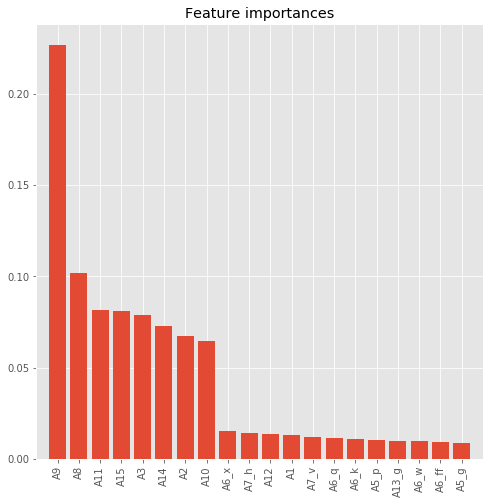

In [83]:
d_first = 20
plt.figure(figsize=(8, 8))
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align='center')
plt.xticks(range(d_first), np.array(feature_names)[indices[:d_first]], rotation=90)
plt.xlim([-1, d_first]);

In [84]:
best_features = indices[:8]
best_features_names = feature_names[best_features]
print(best_features_names)

Index(['A9', 'A8', 'A11', 'A15', 'A3', 'A14', 'A2', 'A10'], dtype='object')


Мы видим, что основную роль играют признаки A9, A8, A11, A15, A3, A14, A2, A10. Теперь можно попытаться использовать только эти признаки для обучения других моделей.

## GBT – градиентный бустинг деревьев решений¶

GBT – еще один метод, строящий ансамбль деревьев решений. На каждой итерации строится новый классификатор, аппроксимирующий значение градиента функции потерь.

In [86]:
from sklearn import ensemble
gbt = ensemble.GradientBoostingClassifier(n_estimators=100, random_state=11)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))
print (err_train, err_test)

0.0248447204969 0.101449275362


Ошибка на тестовой выборке (10.1%) чуть выше, чем для случайного леса.

Заметим, что при использовании найденных выше значимых признаков ошибка практически не меняется:

In [87]:
gbt = ensemble.GradientBoostingClassifier(n_estimators=100, random_state=11)
gbt.fit(X_train[best_features_names], y_train)

err_train = np.mean(y_train != gbt.predict(X_train[best_features_names]))
err_test = np.mean(y_test != gbt.predict(X_test[best_features_names]))
print (err_train, err_test)

0.0351966873706 0.106280193237


Мы предоставляем читателю возможность самому поэкспериментировать и попробовать подобрать наилучшие значения параметров данного метода.

Не забудьте потом проверить качество алгоритма на тестовой выборке!

## Итоги

В нашем небольшом эксперименте победил алгоритм случайного леса – Random Forest, с тестовой ошибкой 9.7%. Также неплохие результаты удалось получить с помощью градиентного бустинга деревьев решений – GBT. Причем кажется, что из GBT выжато не все, на что он способен!

Можно продолжать эксперименты с этими и другими алгоритмами.

Как уже отмечалось ранее, также важен отбор и синтез признаков. Для этого также можно попробовать разные алгоритмы.

Дерзайте!